## **Submission Klasifikasi Teks Model NLP Tensor Flow oleh Nurul Tazkiyah Adam**

In [1]:
# memastikan tensorflow yang digunakan versi 2 atau lebih
import tensorflow as tf
print(tf.__version__)

2.9.2


In [2]:
# download dataset dari google drive https://drive.google.com/file/d/1KiijiWW5fcmGYHza8hnVfG_3Cbv9AnyW/view?usp=sharing
!gdown 1KiijiWW5fcmGYHza8hnVfG_3Cbv9AnyW

Downloading...
From: https://drive.google.com/uc?id=1KiijiWW5fcmGYHza8hnVfG_3Cbv9AnyW
To: /content/bbc-text.csv
100% 5.06M/5.06M [00:00<00:00, 35.3MB/s]


In [3]:
import pandas as pd

df = pd.read_csv("bbc-text.csv")
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
category = pd.get_dummies(df['category'])
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='category')
df_new

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(new_df):
    filtered_words = [word.lower() for word in new_df.split() if word.lower() not in stop_words]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
print(stop_words)

{'which', "aren't", 'above', 'here', 'its', "that'll", 'did', "didn't", 'needn', 'at', 'we', 'she', 'each', 'hasn', 'wouldn', 'aren', 'while', 'any', 't', 'and', 'don', 'll', 'over', 'only', 'itself', 's', 'haven', 'yours', 'ours', 'ourselves', 'if', 'shouldn', 'her', 'hadn', "wouldn't", 'being', 'my', 'they', 'of', 'mustn', 'whom', "mightn't", 'our', "she's", 'how', 'these', 'me', 'were', 'm', 'such', "you'll", "isn't", 'himself', 'now', 'the', "you'd", 'other', 'it', 'them', 'where', 'shan', 'few', 'd', 'o', 'on', 'further', 'during', "you're", 'weren', "shouldn't", "doesn't", 've', 'all', 'when', 'yourself', 'couldn', 'have', 'he', 'will', 'having', "you've", 'most', 'ma', 'who', "it's", 'those', 'because', "weren't", 'theirs', 'was', 'with', 'has', 'until', 'into', 'both', 'had', 'doesn', 'than', 'ain', 'is', 'for', 'no', 'down', 'about', 'didn', 'your', 'an', "should've", 'won', "don't", 'under', 'in', 'what', 'wasn', 'their', 'you', 'there', 'yourselves', 'very', 'again', 'doing'

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#proses tokenizer, filter simbol, dan mengubah tulisan menjadi kecil
tokenizer = Tokenizer(num_words=5000, oov_token='x', 
                      filters='!#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True) 
tokenizer.fit_on_texts(df_new['text'])
word_index = tokenizer.word_index #identifikasi kata unik
print('Found %s unique tokens / words' %len(word_index))


X = tokenizer.texts_to_sequences(df_new['text'])
X = pad_sequences(X, maxlen=250)
print('Shape of data tensor:', X.shape)

Found 29726 unique tokens / words
Shape of data tensor: (2225, 250)


In [8]:
Y = pd.get_dummies(df['category']).values
print('Shape of label tensor:', Y.shape) #untuk mengetahui jumlah label

Shape of label tensor: (2225, 5)


In [9]:
from sklearn.model_selection import train_test_split

#melatih data latih dan data uji 
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1780, 250) (1780, 5)
(445, 250) (445, 5)


In [46]:
from keras.models import Sequential

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=100, input_length=X.shape[1]), # input_dim mengikuti jumlah num_words di tokenizer
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),    
    tf.keras.layers.Dense(5, activation='softmax') # Sesuaikan dengan banyaknya kelas
])

In [47]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [48]:
class berhenti(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('val_accuracy') >= 0.9):
      print('\nalhamdulillah akurasi mencapai lebih 90%')
      self.model.stop_training = True
iniCallback = berhenti()

In [49]:
history = model.fit(x_train, y_train,  
                    epochs = 50, batch_size=64,
                    validation_data = (x_test, y_test), # menampilkan akurasi pengujian data validasi
                    validation_steps = 5,
                    verbose = 2,
                    callbacks = [iniCallback])

Epoch 1/50
28/28 - 3s - loss: 1.6031 - accuracy: 0.2416 - val_loss: 1.5895 - val_accuracy: 0.2844 - 3s/epoch - 95ms/step
Epoch 2/50
28/28 - 0s - loss: 1.3163 - accuracy: 0.4000 - val_loss: 1.0068 - val_accuracy: 0.4969 - 351ms/epoch - 13ms/step
Epoch 3/50
28/28 - 0s - loss: 0.8113 - accuracy: 0.6427 - val_loss: 0.7873 - val_accuracy: 0.5875 - 386ms/epoch - 14ms/step
Epoch 4/50
28/28 - 0s - loss: 0.4981 - accuracy: 0.7994 - val_loss: 0.7168 - val_accuracy: 0.7344 - 355ms/epoch - 13ms/step
Epoch 5/50
28/28 - 0s - loss: 0.3225 - accuracy: 0.8978 - val_loss: 0.5386 - val_accuracy: 0.8406 - 384ms/epoch - 14ms/step
Epoch 6/50
28/28 - 0s - loss: 0.1198 - accuracy: 0.9635 - val_loss: 0.4139 - val_accuracy: 0.8469 - 394ms/epoch - 14ms/step
Epoch 7/50
28/28 - 0s - loss: 0.0442 - accuracy: 0.9904 - val_loss: 0.4960 - val_accuracy: 0.8500 - 352ms/epoch - 13ms/step
Epoch 8/50
28/28 - 0s - loss: 0.0238 - accuracy: 0.9933 - val_loss: 0.3952 - val_accuracy: 0.8781 - 383ms/epoch - 14ms/step
Epoch 9/50


Text(0.5, 1.0, 'Training and Validation Loss')

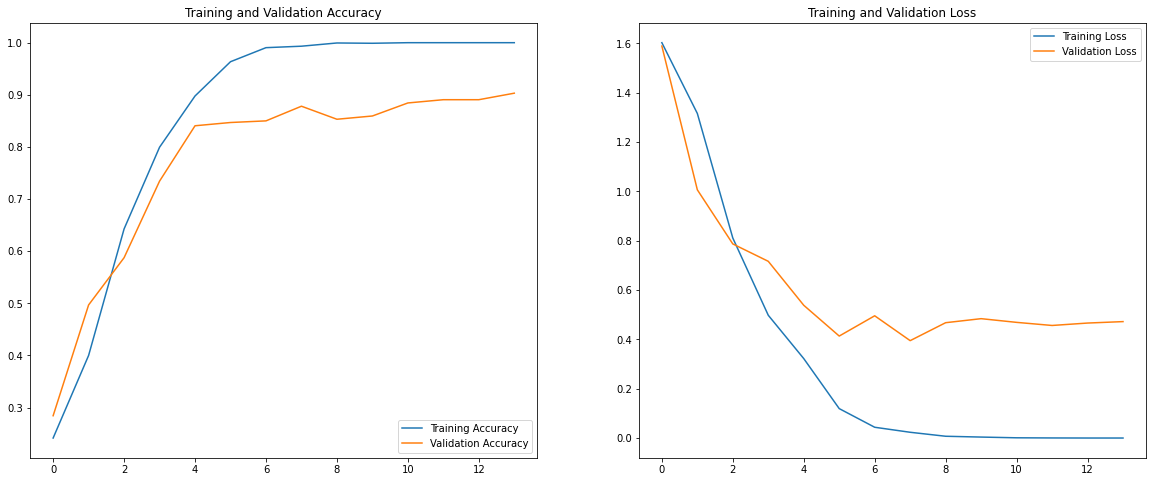

In [50]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

## **Referensi**


1.   [Tutorial Klasifikasi Teks dengan Long Short-term Memory (LSTM): Studi Kasus Teks Review E-Commerce](https://youtu.be/RYI0tqngVy4)
2.   [TensorFlow Tutorial 11 - Text Classification - NLP Tutorial](https://youtu.be/kxeyoyrf2cM)
3.   [Dasar Text Preprocessing dengan Python](https://ksnugroho.medium.com/dasar-text-preprocessing-dengan-python-a4fa52608ffe)
4.   [Fadillahnanda / Membuat-Model-NLP-dengan-TensorFlow-Klasifikasi-Teks-twitter-sentiment-data
](https://github.com/Fadillahnanda/Membuat-Model-NLP-dengan-TensorFlow-Klasifikasi-Teks-twitter-sentiment-data/blob/e59198357686a96eabb778398389cbb0d5c8b995/Proyek_Pertama_Membuat_Model_NLP_dengan_TensorFlow_Klasifikasi_Teks_.ipynb)


